<a href="https://colab.research.google.com/github/kojomensahonums/Azubi-Data-Analytics/blob/master/Azubi_Data_analytics_assessment_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the required packages
!pip install joblib
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

Data about whether or not a customer will subscribe to a term deposit

In [2]:
# Read entire file as a single string
with open('/content/drive/MyDrive/Azubi data source/bank-names.txt', 'r', encoding='utf-8') as file:
    text = file.read()
print(text)


1. Relevant Information:

   The data is related with direct marketing campaigns of a banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

2. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

3. Number of Attributes: 16 + output attribute.

4. Attribute information:

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                              

In [3]:
# Read the data into a dataframe
# The data is separated by semi-colons, hence, delimiting by ";"
df = pd.read_csv('/content/drive/MyDrive/Azubi data source/bank-full.csv',delimiter=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Exploratory Data Analysis

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

print("Categorical columns:", categorical_cols.tolist())
print("Numerical columns:", numerical_cols.tolist())

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [6]:
# Explore statistical features of the data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# Check for duplicates and missing data
# The data is clean, no duplicates nor missing values
df.duplicated().value_counts()
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


### Charts to visualise data points

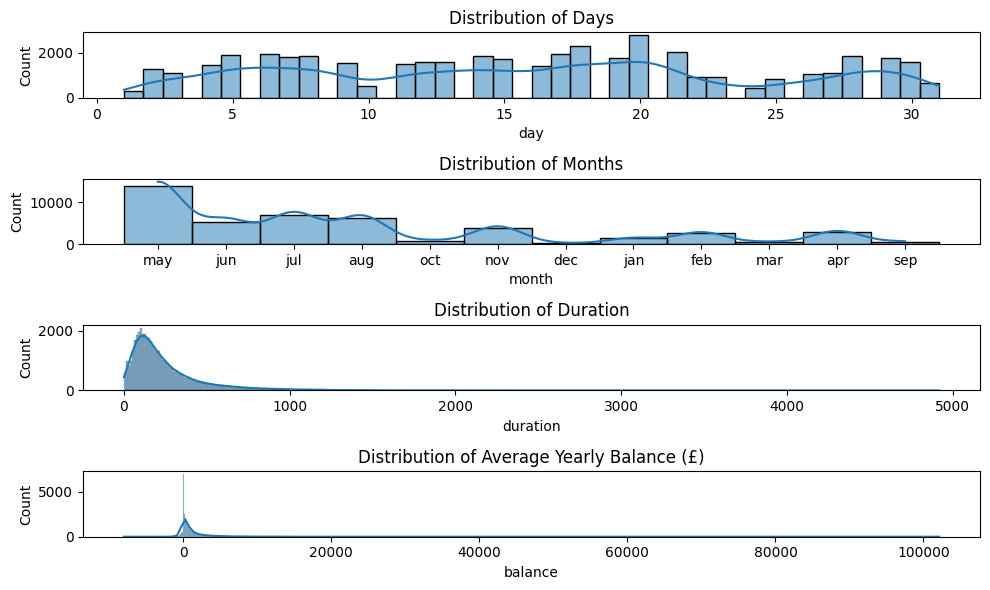

In [8]:
# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 6))

# Plot on individual subplots
sns.histplot(x="day", data=df, ax=axes[0], kde=True)
sns.histplot(x="month", data=df, ax=axes[1], kde=True)
sns.histplot(x="duration", data=df, ax=axes[2], kde=True)
sns.histplot(x="balance", data=df, ax=axes[3], kde=True)

# Add titles to each subplot
axes[0].set_title("Distribution of Days")
axes[1].set_title("Distribution of Months")
axes[2].set_title("Distribution of Duration")
axes[3].set_title("Distribution of Average Yearly Balance (£)")

# Adjust layout for better spacing
plt.tight_layout()

plt.show()


* In two years ('08-'10), very few calls were made between April and September. Only February, April and November had substancial call numbers.

*   Most of the calls made lasted less than 1000 seconds (approximately 17 minutes).
*   Each working day had a fair number of calls.
*   Majority of customers have very low remaining balances.



[Text(0, 0, 'primary'),
 Text(1, 0, 'secondary'),
 Text(2, 0, 'tertiary'),
 Text(3, 0, 'unknown')]

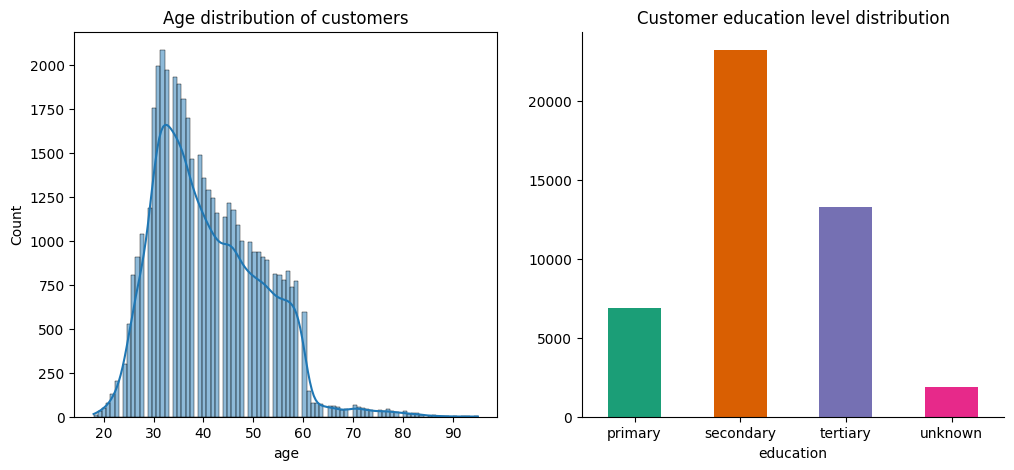

In [9]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot on the first subplot
sns.histplot(x="age", data=df, ax=axes[0], kde=True)
axes[0].set_title("Age distribution of customers")

# Plot on the second subplot
df.groupby('education').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'), ax=axes[1])
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("Customer education level distribution")

# Rotate x-axis labels for first subplot
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

[Text(0, 0, 'divorced'), Text(1, 0, 'married'), Text(2, 0, 'single')]

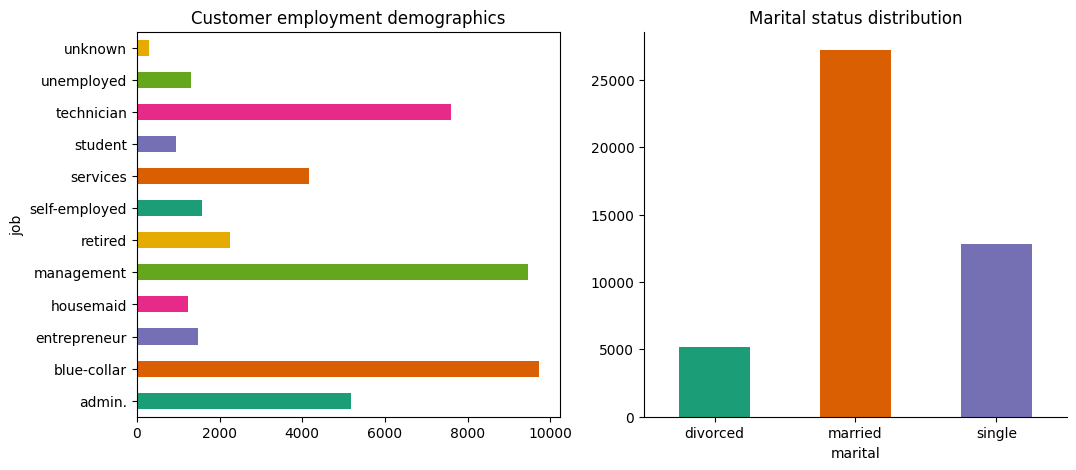

In [10]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot on the first subplot
df.groupby('job').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'), ax=axes[0])
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("Customer employment demographics")

# Plot on the second subplot
df.groupby('marital').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'), ax=axes[1])
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("Marital status distribution")

# Rotate x-axis labels for first subplot
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)


[Text(0, 0, 'no'), Text(1, 0, 'yes')]

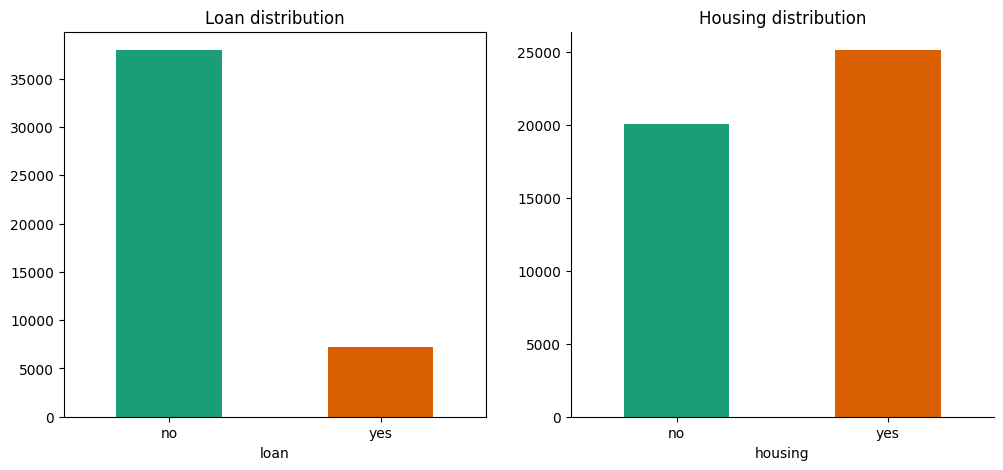

In [11]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot on the first subplot
df.groupby('loan').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'), ax=axes[0])
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("Loan distribution")

# Plot on the second subplot
df.groupby('housing').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("Housing distribution")

# Rotate x-axis labels for second subplot
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

[Text(0, 0, 'cellular'), Text(1, 0, 'telephone'), Text(2, 0, 'unknown')]

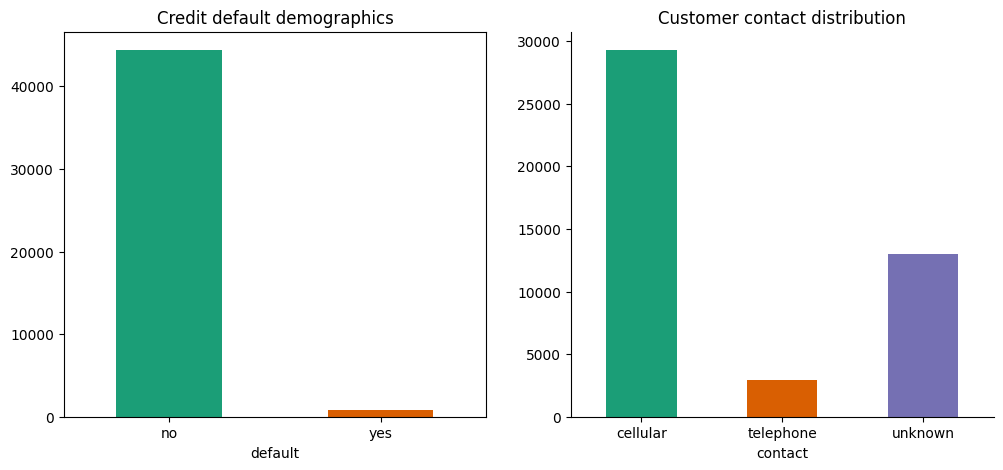

In [12]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot on the first subplot
df.groupby('default').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'), ax=axes[0])
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("Credit default demographics")

# Plot on the second subplot
df.groupby('contact').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("Customer contact distribution")

# Rotate x-axis labels for second subplot
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

[Text(0, 0, 'no'), Text(1, 0, 'yes')]

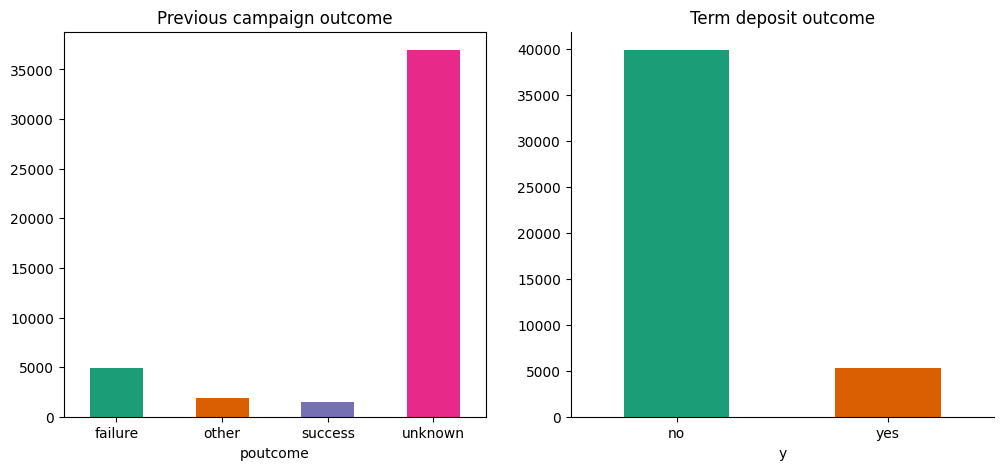

In [13]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot on the first subplot
df.groupby('poutcome').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'), ax=axes[0])
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[0].set_title("Previous campaign outcome")

# Plot on the second subplot
df.groupby('y').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
axes[1].set_title("Term deposit outcome")

# Rotate x-axis labels for second subplot
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

The data is not balanced in terms of the final decision. 88% of customers did not subscribe to the term deposit. I am surprised 81% of the previous outcome results were "unknown". What could have caused this lack of result tracking?

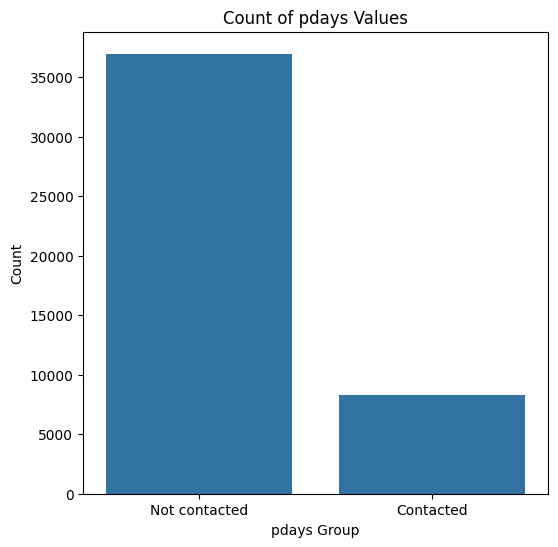

In [14]:
# Convert 'pdays' to strings indicating concacted and not-contacted
df['pdays_group'] = df['pdays'].apply(lambda x: 'Not contacted' if x < 0 else 'Contacted')

# Create a countplot of the new 'pdays_group' column
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='pdays_group')
plt.title('Count of pdays Values')
plt.xlabel('pdays Group')
plt.ylabel('Count')
plt.show()

About 80% of customers were not contacted back. This may have influenced the previous outcome results and potentially whether or not customers subscribed to the term deposit.

In [15]:
# Create numeric equivalent of column y to help determine correlations
df['y_numeric'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [16]:
# Restage numeric columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

print("Numerical columns:", numerical_cols.tolist())

Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y_numeric']


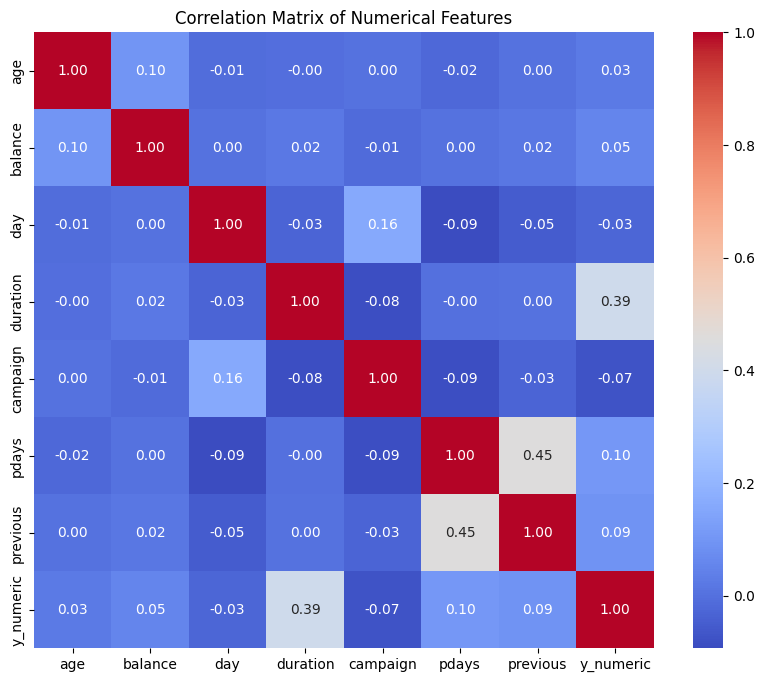

In [17]:
# Select only the numerical columns
numerical_df = df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

*   Age, Balance, Duration, Days between last contact and Previous outcome results influence term deposit results.
*   Call duration may be the most significant numerical feature.



# Feature Engineering

* Transform categorical columns into numerical and take y out.
* Or just leave y out if it is properly encoded.
* Select the numerical columns that have some correlation.
* Transform the contacted column into numeric, 1 for contacted, 0 for not contacted
* Normalise numeric columns except days to fix outlier issue.

In [18]:
# Handling categorical column, encoding them
# Select the categorical columns for encoding
categorical_cols_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'pdays_group']

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True) # drop_first=True avoids multicollinearity

# Display the first few rows of the encoded dataframe
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,y_numeric,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,pdays_group_Not contacted
0,58,2143,5,261,1,-1,0,no,0,False,...,False,False,True,False,False,False,False,False,True,True
1,44,29,5,151,1,-1,0,no,0,False,...,False,False,True,False,False,False,False,False,True,True
2,33,2,5,76,1,-1,0,no,0,False,...,False,False,True,False,False,False,False,False,True,True
3,47,1506,5,92,1,-1,0,no,0,True,...,False,False,True,False,False,False,False,False,True,True
4,33,1,5,198,1,-1,0,no,0,False,...,False,False,True,False,False,False,False,False,True,True


In [19]:
df_encoded.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'y_numeric', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'pdays_group_Not contacted'],
      dtype='object')

In [20]:
# Inferring from the correlation matrix, 'campaign' and 'day' do not have a positive correlation on the predicted variable hence will be dropped
# Columns 'y' and 'pdays' have already been converted to a suitable format, hence, no longer needed
df_select_encoded = df_encoded.drop(columns=['campaign','day','y','pdays'])
df_select_encoded

,age,balance,duration,previous,y_numeric,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,pdays_group_Not contacted
0,58,2143,261,0,0,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,True
1,44,29,151,0,0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,True
2,33,2,76,0,0,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,True
3,47,1506,92,0,0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,True
4,33,1,198,0,0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,0,1,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
45207,71,1729,456,0,1,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,True
45208,72,5715,1127,3,1,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
45209,57,668,508,0,0,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True


In [21]:
df_select_encoded.columns

Index(['age', 'balance', 'duration', 'previous', 'y_numeric',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'pdays_group_Not contacted'],
      dtype='object')

In [22]:
# Identify columns for Robust Scaling (highly skewed, outliers)
robust_scale_cols = ['balance', 'duration', 'pdays_group_Not contacted', 'previous']

# Identify columns for Standard Scaling (less skewed, fewer outliers)
standard_scale_cols = ['age']

# Create copies of the dataframes to avoid modifying the original
df_scaled = df_select_encoded.copy()

# Apply Robust Scaling
robust_scaler = RobustScaler()
df_scaled[robust_scale_cols] = robust_scaler.fit_transform(df_scaled[robust_scale_cols])

# Apply Standard Scaling
standard_scaler = StandardScaler()
df_scaled[standard_scale_cols] = standard_scaler.fit_transform(df_scaled[standard_scale_cols])

# Display the first few rows of the scaled dataframe
df_scaled.head()


,age,balance,duration,previous,y_numeric,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,pdays_group_Not contacted
0,1.606965,1.250000,0.375000,0.0,0,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,0.0
1,0.288529,-0.308997,-0.134259,0.0,0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0.0
2,-0.747384,-0.328909,-0.481481,0.0,0,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,0.0
3,0.571051,0.780236,-0.407407,0.0,0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0.0
4,-0.747384,-0.329646,0.083333,0.0,0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,0.0


# Model Building



*   The idea is to use bank-full for the training. Split this into train-test splits.
*   Test out model performance on bank-csv (smaller version). Compare model performance with ground truth



In [23]:
# Separate features (X) and target (y)
# y_numeric was created earlier to represent the target variable
X = df_scaled.copy()
y = df['y_numeric'] # Use the original y_numeric column from df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Train XGBoost Model
print("\nTraining XGBoost model...")
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


Shape of X_train: (36168, 41)
Shape of X_test: (9043, 41)
Shape of y_train: (36168,)
Shape of y_test: (9043,)

Training XGBoost model...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:33:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [25]:
# Evaluate XGBoost Model
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("XGBoost ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7985
           1       1.00      1.00      1.00      1058

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043

XGBoost Confusion Matrix:
[[7985    0]
 [   0 1058]]
XGBoost ROC AUC Score: 1.0


# Model Evaluation

In [26]:
# Read the data into a dataframe
# The data is separated by semi-colons, hence, delimiting by ";"
eval_df = pd.read_csv('/content/drive/MyDrive/Azubi data source/bank.csv',delimiter=";")
eval_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [27]:
def evaluate_model_performance(model, eval_df, target_column='y', numerical_cols=None, categorical_cols=None, robust_scale_cols=None, standard_scale_cols=None):
    """
    Evaluates a trained classification model on a given dataframe using various metrics.

    Args:
        model: The trained scikit-learn or compatible model.
        eval_df (pd.DataFrame): The dataframe containing evaluation data.
        target_column (str): The name of the target variable column.
        numerical_cols (list, optional): List of numerical column names. If None,
                                         numerical columns are inferred.
        categorical_cols (list, optional): List of categorical column names. If None,
                                           categorical columns are inferred.
        robust_scale_cols (list, optional): List of columns to apply Robust Scaling.
        standard_scale_cols (list, optional): List of columns to apply Standard Scaling.

    Returns:
        dict: A dictionary containing the classification report, confusion matrix,
              and ROC AUC score.
    """
    # Make a copy to avoid modifying the original eval_df
    eval_df_processed = eval_df.copy()

    # Convert target column to numeric (assuming 'yes'/'no' or similar)
    if eval_df_processed[target_column].dtype == 'object':
        eval_df_processed['y_numeric'] = eval_df_processed[target_column].apply(lambda x: 1 if x == 'yes' else 0)
        y_eval = eval_df_processed['y_numeric']
    else:
        y_eval = eval_df_processed[target_column]

    # Infer column types if not provided
    if numerical_cols is None:
        numerical_cols = eval_df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
        # Exclude the target column if it was numeric initially
        if target_column in numerical_cols:
            numerical_cols.remove(target_column)

    if categorical_cols is None:
        categorical_cols = eval_df_processed.select_dtypes(include=['object']).columns.tolist()
        # Exclude the target column if it's still in the object list
        if target_column in categorical_cols:
             categorical_cols.remove(target_column)


    # Handle 'pdays' if present and not in numerical_cols already
    if 'pdays' in eval_df_processed.columns and 'pdays' not in numerical_cols:
         eval_df_processed['pdays_group'] = eval_df_processed['pdays'].apply(lambda x: 'Not contacted' if x < 0 else 'Contacted')
         if 'pdays_group' not in categorical_cols:
             categorical_cols.append('pdays_group')


    # Apply One-Hot Encoding
    eval_df_encoded = pd.get_dummies(eval_df_processed, columns=categorical_cols, drop_first=True)

    # Drop original target column and any other columns not used in training
    # This assumes the evaluation data has the same feature set structure as the training data used for the model
    # It's crucial that the columns in eval_df_encoded match the columns the model was trained on.
    # We need to align columns with the training data.
    # Get columns from the training data (assuming X_train is available from previous code)
    train_cols = X_train.columns # Access X_train from the preceding code context

    # Ensure eval_df_encoded has the same columns as X_train in the same order
    missing_cols = set(train_cols) - set(eval_df_encoded.columns)
    for c in missing_cols:
        eval_df_encoded[c] = 0 # Add missing columns with default value 0

    # Reindex the evaluation dataframe to have the same columns and order as the training data
    X_eval = eval_df_encoded[train_cols]


    # Apply Scaling using the *same* scalers fitted on the training data
    # Access the fitted scalers from the preceding code context
    # Assuming robust_scaler and standard_scaler objects exist from the training phase

    if robust_scale_cols is not None and robust_scaler is not None:
         # Ensure columns exist in X_eval before scaling
         cols_to_robust_scale = [col for col in robust_scale_cols if col in X_eval.columns]
         X_eval[cols_to_robust_scale] = robust_scaler.transform(X_eval[cols_to_robust_scale])

    if standard_scale_cols is not None and standard_scaler is not None:
        # Ensure columns exist in X_eval before scaling
        cols_to_standard_scale = [col for col in standard_scale_cols if col in X_eval.columns]
        X_eval[cols_to_standard_scale] = standard_scaler.transform(X_eval[cols_to_standard_scale])


    # Predict using the model
    y_pred_eval = model.predict(X_eval)
    y_pred_proba_eval = model.predict_proba(X_eval)[:, 1]

    # Calculate metrics
    report = classification_report(y_eval, y_pred_eval, output_dict=True)
    conf_matrix = confusion_matrix(y_eval, y_pred_eval).tolist() # Convert to list for easier handling/printing
    roc_auc = roc_auc_score(y_eval, y_pred_proba_eval)

    # Return results
    evaluation_results = {
        'classification_report': report,
        'confusion_matrix': conf_matrix,
        'roc_auc_score': roc_auc
    }

    return evaluation_results



In [28]:
# Define the columns based on the training process
# These lists should match how X_train was created
numerical_cols_train = ['age', 'balance', 'duration', 'previous'] # 'campaign' and 'day' were dropped
categorical_cols_train = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'pdays_group'] # 'pdays_group' was created from 'pdays'

robust_scale_cols_train = ['balance', 'duration', 'pdays_group_Not contacted', 'previous'] # Based on the training code
standard_scale_cols_train = ['age'] # Based on the training code


# Evaluate XGBoost model on eval_df
print("Evaluating XGBoost model on eval_df:")
xgb_eval_results = evaluate_model_performance(
    xgb_model,
    eval_df,
    target_column='y',
    numerical_cols=numerical_cols_train,
    categorical_cols=categorical_cols_train,
    robust_scale_cols=robust_scale_cols_train,
    standard_scale_cols=standard_scale_cols_train
)
print("Classification Report:\n", pd.DataFrame(xgb_eval_results['classification_report']).transpose()) # Print report nicely
print("\nConfusion Matrix:\n", xgb_eval_results['confusion_matrix'])
print("\nROC AUC Score:", xgb_eval_results['roc_auc_score'])


Evaluating XGBoost model on eval_df:
Classification Report:
               precision  recall  f1-score  support
0                   1.0     1.0       1.0   4000.0
1                   1.0     1.0       1.0    521.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   4521.0
weighted avg        1.0     1.0       1.0   4521.0

Confusion Matrix:
 [[4000, 0], [0, 521]]

ROC AUC Score: 1.0


<ipython-input-27-1984361181>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_eval[cols_to_robust_scale] = robust_scaler.transform(X_eval[cols_to_robust_scale])
<ipython-input-27-1984361181>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_eval[cols_to_standard_scale] = standard_scaler.transform(X_eval[cols_to_standard_scale])


In [29]:
eval_df['y'].value_counts()

,count
y,
no,4000
yes,521


# Findings and Insights

* The predicted variable, 'y', which indicates whether term deposit was subscribed by customers has been set this way:
* 0 --> no
* 1 --> yes

The results on bank.csv data shows that the model predicted results correctly. This level of accuracy can be attributed to the careful selection of columns and to the scaling techniques deployed.

# Save Model

In [30]:
# Define the filename for the saved model
model_filename = 'xgb_bank_marketing_model.joblib'

# Save the trained LightGBM model to a file
joblib.dump(xgb_model, model_filename)

print(f"Model saved successfully to {model_filename}")

# You can optionally download the model file if running in Google Colab
try:
  from google.colab import files
  files.download(model_filename)
except Exception as e:
  print(f"Could not download the model file (likely not in Colab environment): {e}")

# To load the model later:
# loaded_model = joblib.load(model_filename)
# print("Model loaded successfully.")

Model saved successfully to xgb_bank_marketing_model.joblib


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Saving encoders

In [32]:
# Save Your Column List (After Encoding + Feature Selection)
model_columns = df_scaled.columns.tolist()
joblib.dump(model_columns, 'model_columns.joblib')

# Save your scalers
joblib.dump(robust_scaler, 'robust_scaler.joblib')
joblib.dump(standard_scaler, 'standard_scaler.joblib')

# Save the list each scaler applied to
joblib.dump(robust_scale_cols, 'robust_columns.joblib')
joblib.dump(standard_scale_cols, 'standard_columns.joblib')

# Download All Files from Colab
from google.colab import files
files.download('model_columns.joblib')
files.download('robust_scaler.joblib')
files.download('standard_scaler.joblib')
files.download('robust_columns.joblib')
files.download('standard_columns.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>